In [21]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [4]:
os.getcwd()

'/Users/mohi9282/Desktop/iNeuron/Machine Learning/Projects/waferFaultDetection/waferClassifier'

In [14]:
data = pd.read_csv('Data_Preprocessing/clean_X.csv')
data.head()

Unnamed: 0  Sensor - 1  Sensor - 2  Sensor - 3  Sensor - 4  Sensor - 5  \
0           0     3073.48     2467.18   2200.2000   1121.1875      1.3171   
1           1     3027.61     2430.03   2219.7667   2086.4710      1.3381   
2           2     2950.97     2533.95   2249.2556   2065.0624      2.1216   
3           3     3093.12     2500.90   2219.7667   2086.4710      1.3381   
4           4     2988.76     2497.58   2153.9778   1192.6994      1.3522   

   Sensor - 7  Sensor - 8  Sensor - 9  Sensor - 10  ...  Sensor - 581  \
0    103.8978      0.1191      1.4015       0.0095  ...      0.004133   
1     98.8900      0.1234      1.4090       0.0160  ...      0.003000   
2     95.7967      0.1222      1.3418      -0.0112  ...      0.005633   
3     98.8900      0.1234      1.4117       0.0087  ...      0.010500   
4    100.9367      0.1225      1.4590      -0.0074  ...      0.007000   

   Sensor - 582  Sensor - 583  Sensor - 584  Sensor - 585  Sensor - 586  \
0     64.582000        0.5046        0.0065        0.0022        1.2845   
1     50.177800        0.4984        0.0130        0.0033        2.6161   
2    100.867867        0.5062        0.0117        0.0033        2.3019   
3    106.558200        0.5038        0.0133        0.0040        2.6341   
4     76.751000        0.5001        0.0099        0.0025        1.9807   

   Sensor - 587  Sensor - 588  Sensor - 589  Sensor - 590  
0        0.0267        0.0174        0.0050       65.1609  
1        0.0267        0.0174        0.0050       65.1609  
2        0.0267        0.0174        0.0050       65.1609  
3        0.0292        0.0311        0.0105      106.5582  
4        0.0282        0.0217        0.0070       76.7510  

[5 rows x 475 columns]

In [15]:
X = data.drop('Unnamed: 0', axis=1)
print(X.shape)

(837, 474)


In [16]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    pred = kmeans.fit(X)
    wcss.append(pred.inertia_)
    
wcss

[84331035818.0085,
 44028817403.003654,
 34181715443.897434,
 27505250479.50228,
 24487238145.79915,
 21857237993.667805,
 19913967751.71556,
 18149083253.730568,
 16667110417.11506,
 15501355292.352467]

Text(0, 0.5, 'WCSS')

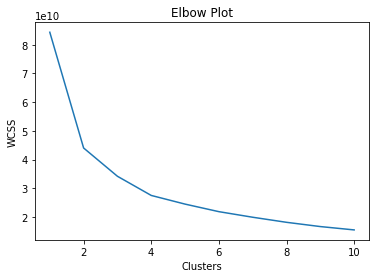

In [20]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

In [24]:
knee_loc = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
optimal_clusters = knee_loc.knee
optimal_clusters


3

In [33]:
import time
start = time.time()
kmeans = KMeans(n_clusters=optimal_clusters, init="k-means++", random_state=42)
preds = kmeans.fit_predict(X)
X['Cluster'] = preds
print(f'Elapsed = {(time.time()-start)/60:.4f} mins')

Elapsed = 0.0022 mins


In [26]:
X.head(10)

Sensor - 1  Sensor - 2  Sensor - 3  Sensor - 4  Sensor - 5  Sensor - 7  \
0     3073.48     2467.18   2200.2000   1121.1875      1.3171    103.8978   
1     3027.61     2430.03   2219.7667   2086.4710      1.3381     98.8900   
2     2950.97     2533.95   2249.2556   2065.0624      2.1216     95.7967   
3     3093.12     2500.90   2219.7667   2086.4710      1.3381     98.8900   
4     2988.76     2497.58   2153.9778   1192.6994      1.3522    100.9367   
5     2990.69     2428.85   2249.2556   2065.0624      2.1216     95.7967   
6     2978.77     2441.17   2254.7111   1981.2999      2.1046     90.9167   
7     3036.99     2448.38   2194.9555   1108.2246      1.2476    102.2822   
8     3006.75     2517.09   2254.7111   1981.2999      2.1046     90.9167   
9     2960.63     2570.46   2206.1444   1876.9899      2.0607     95.9511   

   Sensor - 8  Sensor - 9  Sensor - 10  Sensor - 11  ...  Sensor - 582  \
0      0.1191      1.4015       0.0095      -0.0070  ...     64.582000   
1      0.1234      1.4090       0.0160       0.0018  ...     50.177800   
2      0.1222      1.3418      -0.0112       0.0015  ...    100.867867   
3      0.1234      1.4117       0.0087      -0.0108  ...    106.558200   
4      0.1225      1.4590      -0.0074      -0.0060  ...     76.751000   
5      0.1222      1.3682      -0.0110      -0.0085  ...     79.617000   
6      0.1224      1.4726       0.0041       0.0060  ...     54.532300   
7      0.1202      1.5149       0.0025      -0.0063  ...     94.756367   
8      0.1224      1.5901      -0.0071       0.0127  ...     48.370800   
9      0.1246      1.5341       0.0350      -0.0068  ...     45.701900   

   Sensor - 583  Sensor - 584  Sensor - 585  Sensor - 586  Sensor - 587  \
0        0.5046        0.0065        0.0022        1.2845        0.0267   
1        0.4984        0.0130        0.0033        2.6161        0.0267   
2        0.5062        0.0117        0.0033        2.3019        0.0267   
3        0.5038        0.0133        0.0040        2.6341        0.0292   
4        0.5001        0.0099        0.0025        1.9807        0.0282   
5        0.4964        0.0108        0.0028        2.1740        0.0229   
6        0.4966        0.0078        0.0024        1.5646        0.0229   
7        0.4942        0.0172        0.0052        3.4764        0.0229   
8        0.5020        0.0111        0.0031        2.2182        0.0506   
9        0.4937        0.0146        0.0035        2.9664        0.0437   

   Sensor - 588  Sensor - 589  Sensor - 590  Cluster  
0        0.0174        0.0050       65.1609        0  
1        0.0174        0.0050       65.1609        0  
2        0.0174        0.0050       65.1609        0  
3        0.0311        0.0105      106.5582        0  
4        0.0217        0.0070       76.7510        2  
5        0.0182        0.0063       79.6170        0  
6        0.0182        0.0063       79.6170        0  
7        0.0182        0.0063       79.6170        1  
8        0.0245        0.0093       48.3708        1  
9        0.0200        0.0074       45.7019        0  

[10 rows x 475 columns]